# TF Realization

In [0]:
# Hardcoded notebook for case of 3 centered masses

from google.colab import drive
drive.mount('/content/drive/')
main_path = "./drive/My Drive/diploma/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!pip install plotly==3.10.0
%matplotlib inline

import torch
import tensorflow as tf
from tensorflow.linalg import LinearOperatorToeplitz
import os
import numpy as np
import random
import math
import pandas as pd
import sys
import os
from matplotlib import rcParams
import time
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
from plotly import tools

#np.set_printoptions(threshold=sys.maxsize)

rcParams['figure.subplot.left'] = 0.05
rcParams['figure.subplot.right'] = 0.95
rcParams['figure.subplot.bottom'] = 0.05
rcParams['figure.subplot.top'] = 0.95
rcParams['figure.subplot.hspace'] = 0.2
rcParams['figure.subplot.wspace'] = 0.2

     |████████████████████████████████| 41.5MB 587kB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


# Main args

In [0]:
 #@title Dataset definition

dataset_name = "first_dataset" #@param {type:"string"}
dataset_size = 100000 #@param {type:"integer"}

In [0]:
#@title Main parameters initialization

size_measure = 112 #@param {type:"integer"}
size_cut = 101 #@param {type:"integer"}
max_depth = 100.0  #@param {type:"number"}
min_depth = 20.0  #@param {type:"number"}
N = 3 #@param {type:"integer"}
G = 6.67408e-11  #@param {type:"number"}
M = 15e8  #@param {type:"number"}
record_size = 50176 #@param {type:"number"}

In [0]:
# Args dictionary

args = {"dataset_name" : dataset_name, "dataset_size" : dataset_size,  
        "size_measure" : size_measure, "max_depth" : max_depth, "min_depth" : min_depth, 
        "N" : N, "G" : G, "M" : M, "record_size" : record_size, "size_cut":size_cut}

In [0]:
# Filenames initialization

file_train = main_path + "data/N=" + str(N) + "/" + dataset_name + "/bin_train.dat"
file_test = main_path + "data/N=" + str(N) + "/" + dataset_name + "/bin_test.dat"
file_val = main_path + "data/N=" + str(N) + "/" + dataset_name + "/bin_val.dat"

csv_train = main_path + "data/N=" + str(N) + "/" + dataset_name + "/csv_train.csv"
csv_test = main_path + "data/N=" + str(N) + "/" + dataset_name + "/csv_test.csv"
csv_val = main_path + "data/N=" + str(N) + "/" + dataset_name + "/csv_val.csv"

NameError: ignored

In [0]:
def Grad(x):
  y = []
  for i in range(len(x)-1):
    y.append(x[i]-x[i+1])
  return y

In [0]:
def Get_Image(bin_file_name = None, csv_file = None, image_number = None, args=None):
  
  size_measure = args["size_measure"]
  size_cut = args["size_cut"]
  record_size = args["record_size"]
  i = image_number
  
  fig = plt.figure()
  frame = pd.read_csv(csv_file, sep=',')
  x1 = int(frame.iloc[i]['x1'])
  x2 = int(frame.iloc[i]['x2'])
  x3 = int(frame.iloc[i]['x3'])
  y1 = int(frame.iloc[i]['y1'])
  y2 = int(frame.iloc[i]['y2'])
  y3 = int(frame.iloc[i]['y3'])
  h1 = float(frame.iloc[i]['h1'])
  h2 = float(frame.iloc[i]['h2'])
  h3 = float(frame.iloc[i]['h3'])
  bin_file = open(bin_file_name, 'rb')
  bin_file.seek(image_number * record_size)
  from_bytes = bin_file.read(record_size)
  bin_file.close()
  image = np.frombuffer(from_bytes, dtype=np.float32).copy()
  image = image.reshape([size_measure, size_measure])
  
  vmin=0
  vmax=255
  maximum = np.max(image)

  print("coordinates")
  print([(x1, y1, h1),(x2, y2, h2),(x3, y3, h3)])
  print("values")
  image_round = (np.round_((1.0*vmax/maximum) * (np.array(np.reshape(image, (size_measure, size_measure))))))
  print("max_val")
  plt.imshow(image_round[0:size_cut,0:size_cut], vmin=0, vmax=255)
  plt.colorbar()

  return image[0:size_cut,0:size_cut]

In [0]:
def Plot_3D(U = None, image_number = None, from_bin = True, bin_file_name = None, grid_file_name = None, args = None):
  
  init_notebook_mode(connected=True)
  tools.set_credentials_file(username='Alexander_Telepov', api_key='ZR3lr45xTphFd2UDdv7Z')

  size_cut = args["size_cut"]
  record_size = args["record_size"]

  X = np.array([i for i in range(size_cut)])
  Y = np.array([i for i in range(size_cut)])
  X, Y = np.meshgrid(X, Y)

  if U is not None:
    Z = U
  else:
    if from_bin:
      bin_file = open(bin_file_name, 'rb')
      bin_file.seek(image_number * record_size)
      from_bytes = bin_file.read(record_size)
      bin_file.close()
      image = np.frombuffer(from_bytes, dtype=np.float32).copy()
    else:
      image = np.load(grid_file_name)
    Z = image.reshape([size_cut, size_cut])

  surface = go.Surface(x=X, y=Y, z=Z)
  data = [surface]

  layout = go.Layout(
      title='Parametric Plot',
      scene=dict(
          xaxis=dict(
              gridcolor='rgb(255, 255, 255)',
              zerolinecolor='rgb(255, 255, 255)',
              showbackground=True,
              backgroundcolor='rgb(230, 230,230)'
          ),
          yaxis=dict(
              gridcolor='rgb(255, 255, 255)',
              zerolinecolor='rgb(255, 255, 255)',
              showbackground=True,
              backgroundcolor='rgb(230, 230,230)'
          ),
          zaxis=dict(
              gridcolor='rgb(255, 255, 255)',
              zerolinecolor='rgb(255, 255, 255)',
              showbackground=True,
              backgroundcolor='rgb(230, 230,230)'
          )
      )
  )

  fig = go.Figure(data=data, layout=layout)
  py.iplot(fig, filename='jupyter-parametric_plot')

In [0]:
def Main_Alghorithm(U = None, iter_number = None, depth = None, args = None, true_pot = None, scale = None):

  device = torch.device("cuda:0")

  M = N = (args["size_cut"] - 1) // 2
  h_x = 1.0
  h_y = 1.0
  if scale is not None:
    h_x, h_y = scale * h_x, scale * h_y

  fi = lambda x, y: (1/(2*math.pi))*math.atan((x*y)/ (depth * math.sqrt(x**2 + y**2 + depth**2)))
  func = lambda i, j, n, m: fi((i - n)*h_x + h_x/2, (j - m)*h_y + h_y/2) + fi((i - n)*h_x - h_x/2, (j - m)*h_y - h_y/2) - fi((i - n)*h_x + h_x/2, (j - m)*h_y - h_y/2) - fi((i - n)*h_x - h_x/2, (j - m)*h_y + h_y/2) 
  
  conv = torch.nn.Conv2d(1, 1, 4 * N + 1, stride=1, padding=2*N, bias=False)

  wgt = conv.weight.data

  for i in range(0 , 4*N + 1):
    for j in range(0 , 4*N + 1):
      wgt[0][0][i][j] = func(3*N - i, -3 * N + j, N, -N)

  
  conv.weight.data = torch.tensor(wgt, dtype = torch.double)
  conv = conv.to(device=device)

  gpu_true_pot = torch.tensor(true_pot).reshape(1, 1, U.shape[0], U.shape[1]).to(device=device)#.float()
  res = torch.tensor(U).reshape(1, 1, U.shape[0], U.shape[1]).to(device=device)#.float()
  U_0 = res.clone()

  #return res - conv(res), _, _, _, _ 
  delta_mean = []
  delta_max = []
  delta_squared_mean = []
  delta_squared_max = []

  with torch.no_grad():
    for i in range(iter_number):
      res = U_0 + res - conv(res)
      delta_mean.append((gpu_true_pot - res).abs().mean().item())
      delta_max.append((gpu_true_pot - res).abs().max().item())
      delta_squared_mean.append(((gpu_true_pot - res)**2).mean().item())
      delta_squared_max.append(((gpu_true_pot - res)**2).max().item())

  return res, delta_mean, delta_max, delta_squared_mean, delta_squared_max

In [0]:
def Save_Result(result = None, file_to_save = None, iter_number = None, image_number = None, args= None):

  dataset_name = args["dataset_name"]
  if file_to_save == "Default":

    #if not os.path.exists(main_path + "reference_results/" + dataset_name + "/"):
    os.makedirs(main_path + "reference_results/" + dataset_name + "/" + str(image_number) + "/", exist_ok=True)

    file_name = main_path + "reference_results/" + dataset_name + "/" + str(image_number) + "/" + "iter_" + str(iter_number)

    if os.path.exists(file_name):
      raise ValueError("This file already exists!")

  else:
    file_name = main_path + "reference_results/" + file_to_save

  np.save(file_name, result)

In [0]:
def True_Potential(depth = None, csv_file = None, image_number = None, args=None):
  
  size_cut = args["size_cut"]
  N = args["N"]
  i = image_number
  x, y, h = [0 for j in range(N)], [0 for j in range(N)], [0 for j in range(N)]
  frame = pd.read_csv(csv_file, sep=',')
  x[0] = int(frame.iloc[i]['x1'])
  x[1] = int(frame.iloc[i]['x2'])
  x[2] = int(frame.iloc[i]['x3'])
  y[0] = int(frame.iloc[i]['y1'])
  y[1] = int(frame.iloc[i]['y2'])
  y[2] = int(frame.iloc[i]['y3'])
  h[0] = float(frame.iloc[i]['h1'])
  h[1] = float(frame.iloc[i]['h2'])
  h[2] = float(frame.iloc[i]['h3'])
  
  image = np.zeros((size_cut, size_cut))   
    
  for m in range(N):
    for j in range(0, size_cut):
      for k in range(0, size_cut):
        R = math.sqrt((h[m] - depth)**2 + (x[m] - k)**2 + (y[m] - j)**2)
        #U = -G * M / R
        g = h[m] * G * M / (R**3)
        #image[j][k] += U
        image[j][k] += g

  return image

# Launcher

In [0]:
#@title Image number
image_number = 0 #@param {type:"integer"}
iter_number = 10 #@param {type:"integer"}
depth = 10 #@param {type:"number"}
file_to_save = "Default" #@param {type:"string"}

coordinates
[(63, 54, 96.87764212211307), (46, 47, 23.36387194644217), (50, 57, 21.39370707127562)]
values
max_val


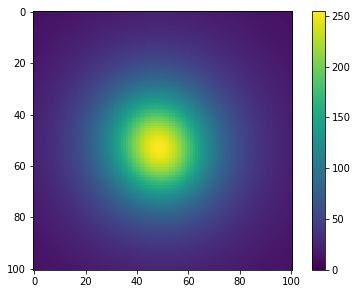

In [0]:
image = Get_Image(bin_file_name = file_train, csv_file = csv_train, image_number = image_number, args=args)

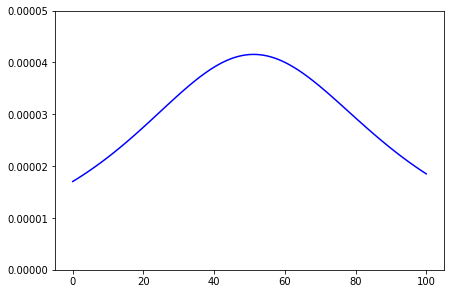

In [0]:
plt.ylim(bottom=0, top=0.00005)
plt.plot([i for i in range(101)], image[0:101,0:101][:,N], c='b')
#Plot_3D(U = image, image_number = image_number, from_bin = False, bin_file_name = file_train, grid_file_name = None, args = args)

In [0]:
true_pot = True_Potential(depth = depth, csv_file = csv_train, image_number = image_number, args=args)
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = iter_number, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.cpu()).reshape(101,101)

In [0]:
from_bin = False
grid_file_name = main_path + "reference_results/" + dataset_name + "/" + str(image_number) + "/" + "iter_" + str(iter_number) + ".npy"

In [0]:
s = 112
Plot_3D(U = result, image_number = image_number, from_bin = False, bin_file_name = file_train, grid_file_name = grid_file_name, args = args)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Alexander_Telepov/0 or inside your plot.ly account where it is named 'jupyter-parametric_plot'


In [0]:
delta = true_pot - result
print(np.absolute(delta).mean(), np.absolute(delta).max(), np.absolute(true_pot).max(), np.absolute(true_pot).mean())

113.19303937886713 1189.6318958712745 0.0005186111004550492 0.00011503367282114913
0.026531626


In [0]:
Save_Result(result = result, file_to_save = file_to_save, iter_number = iter_number, image_number = image_number, args = args)

#Real Case Image0

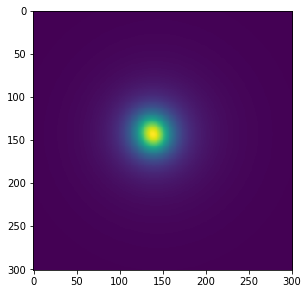

In [0]:

depth = 40
cust_list = np.array([[63, 54, 96.87764212211307], [46, 47, 23.36387194644217], [50, 57, 21.39370707127562]])
x = cust_list[:,0]
y = cust_list[:,1]
h = cust_list[:,2]

image = np.zeros((301, 301))
true_pot = np.zeros((301, 301))

for m in range(3):
  for j in range(0, 301):
    for k in range(0, 301):
      R = math.sqrt((h[m] - 0)**2 + (x[m] - k + 90)**2 + (y[m] - j + 90)**2)
      R_t = math.sqrt((h[m] - depth)**2 + (x[m] - k + 90)**2 + (y[m] - j + 90)**2)
      #U = -G * M / R
      g = h[m] * G * M / (R**3)
      #image[j][k] += U
      image[j][k] += g
      true_pot[j][k] += abs(h[m]-depth) * G * M / (R_t**3)

plt.imshow(image)


# Depth 10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



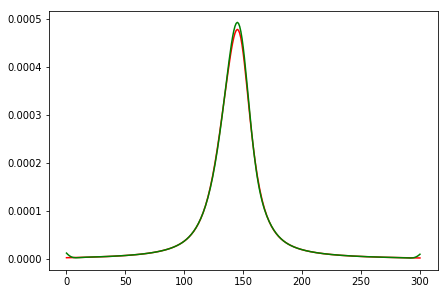

In [0]:
# 30 iter, depth 10
args["size_cut"] = 301
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 30, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.detach().cpu()).reshape(301,301)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='g')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



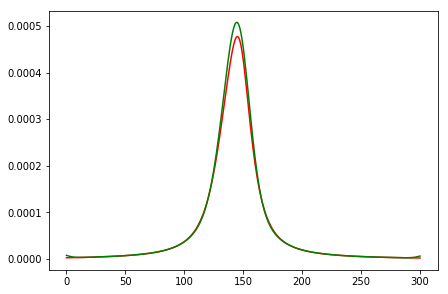

In [0]:
# 10 iter, depth 10
args["size_cut"] = 301
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 10, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.detach().cpu()).reshape(301,301)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='g')

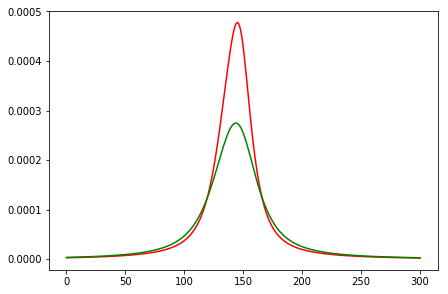

In [0]:
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], image[:,150], c='g')

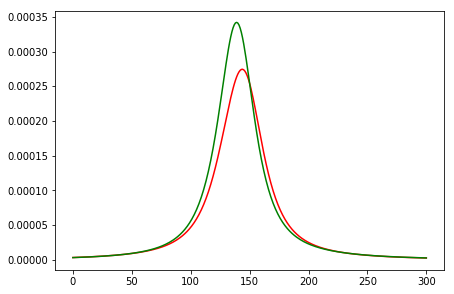

In [0]:
plt.plot([i for i in range(301)], image[:,150], c='r')
plt.plot([i for i in range(301)], image[150,:], c='g')

In [0]:
args["size_cut"] = 301
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 50, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.cpu()).reshape(301,301)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



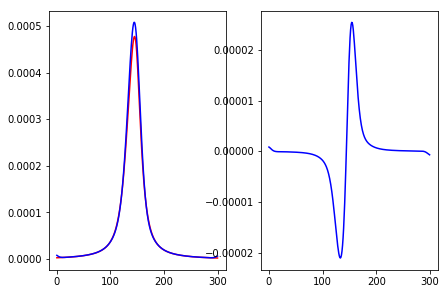

In [0]:
# depth 10, iter 10
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

# Depth 20

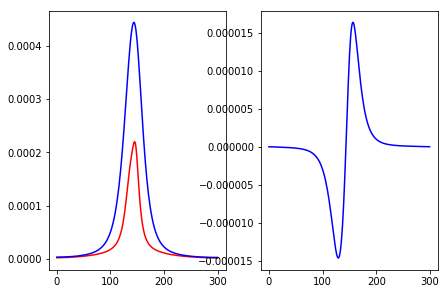

In [0]:
# depth 20, 1 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

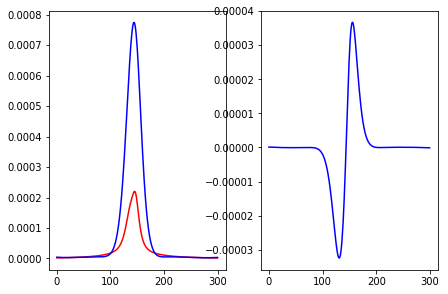

In [0]:
# depth 20, 5 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

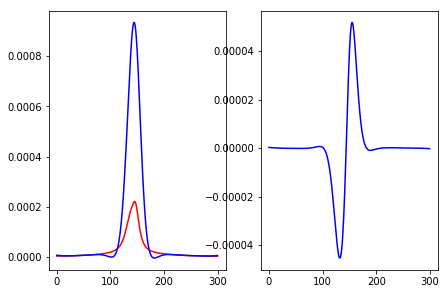

In [0]:
# depth 20, 10 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

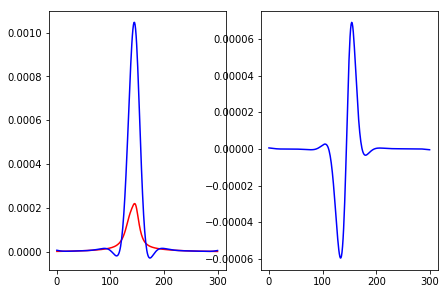

In [0]:
# depth 20, 20 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

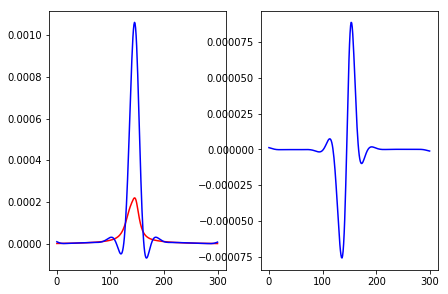

In [0]:
# depth 20, 50 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

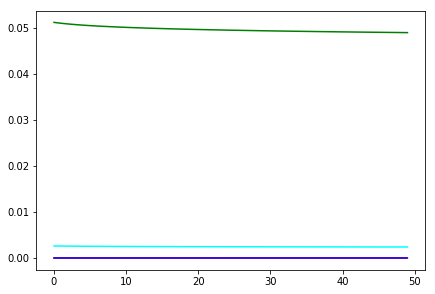

In [0]:
plt.plot([i for i in range(50)], delta_mean[0:50], c='r')
plt.plot([i for i in range(50)], delta_max[0:50], c='g')
plt.plot([i for i in range(50)], delta_squared_mean[0:50], c='b')
plt.plot([i for i in range(50)], delta_squared_max[0:50], c='cyan')

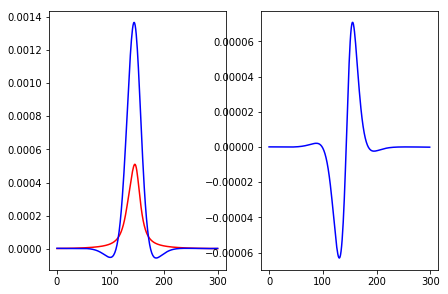

In [0]:
# depth 30, 10 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

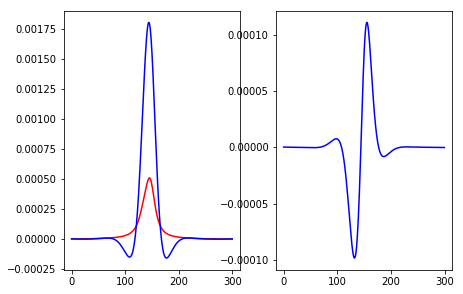

In [0]:
# depth 30, 20 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

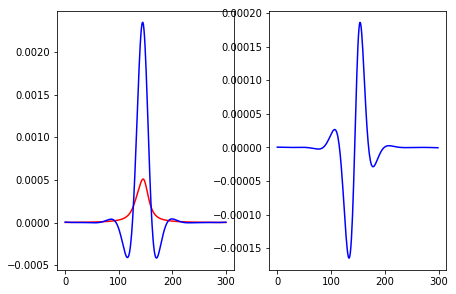

In [0]:
# depth 30, 50 iter
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

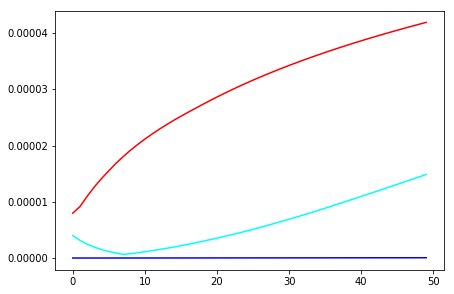

In [0]:
plt.plot([i for i in range(50)], delta_mean[0:50], c='r')
#plt.plot([i for i in range(50)], delta_max[0:50], c='g')
plt.plot([i for i in range(50)], delta_squared_mean[0:50], c='b')
plt.plot([i for i in range(50)], delta_squared_max[0:50], c='cyan')

# Depth 40

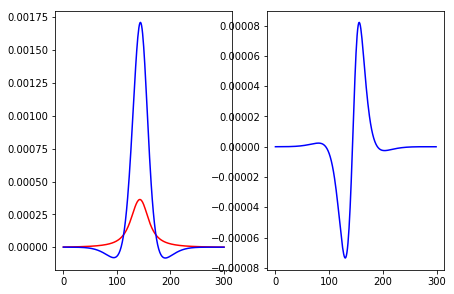

In [0]:
# depth 40, iter 10
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

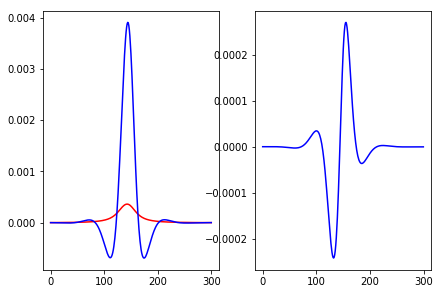

In [0]:
# depth 40, iter 50
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

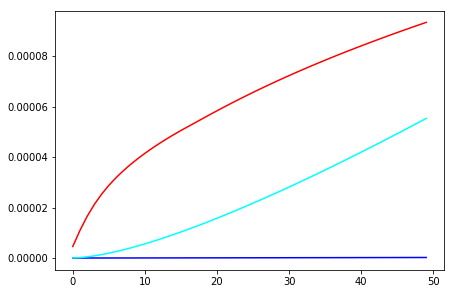

In [0]:
plt.plot([i for i in range(50)], delta_mean[0:50], c='r')
#plt.plot([i for i in range(50)], delta_max[0:50], c='g')
plt.plot([i for i in range(50)], delta_squared_mean[0:50], c='b')
plt.plot([i for i in range(50)], delta_squared_max[0:50], c='cyan')

# 1 Mass Toy example

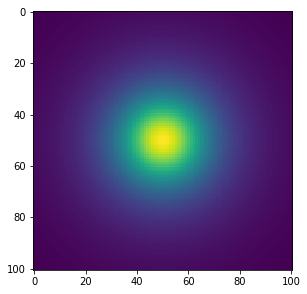

In [0]:
depth = 18

h = 20
image = np.zeros((101, 101))
true_pot = np.zeros((101, 101))
Norm_Const = 1e15 / 166

for j in range(0, 101):
  for k in range(0, 101):
    R = math.sqrt(h**2 + (50 - k)**2 + (50 - j)**2)
    R_t = math.sqrt((h-depth)**2 + (50 - k)**2 + (50 - j)**2)
    #U = -G * M / R
    g = h * G * Norm_Const / (R**3)
    #image[j][k] += U
    image[j][k] += g
    true_pot[j][k] += abs(h - depth) * G * Norm_Const / (R_t**3)

plt.imshow(image)

In [0]:
#saved_result = result.copy()

In [0]:
args["size_cut"] = 101
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 1000, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.cpu()).reshape(101,101)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [0]:
# depth 18, iter 1000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

In [0]:
# Calc ro and g_der_max
grad = np.array(Grad(result[:,50]).copy())
print(np.argmax(grad), grad.max())

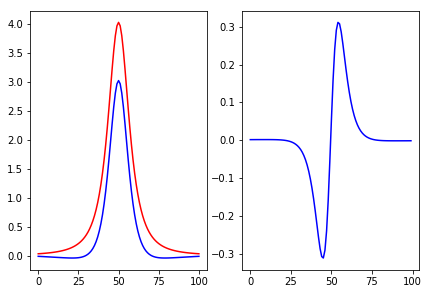

In [0]:
# depth 10, res - conv(res) = blue_curve
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

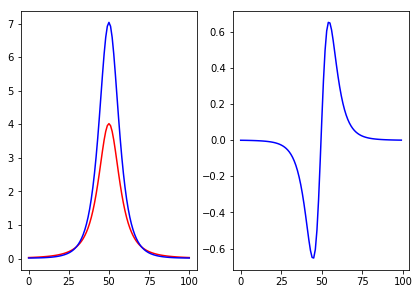

In [0]:
# depth 10, iter 1, U_0 == true_pot
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

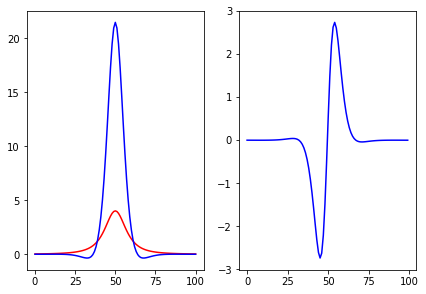

In [0]:
# depth 10, iter 10, U_0 == true_pot
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

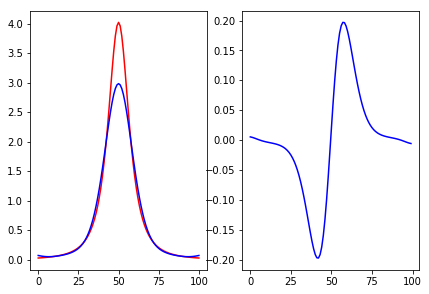

In [0]:
# depth 10, iter 10
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

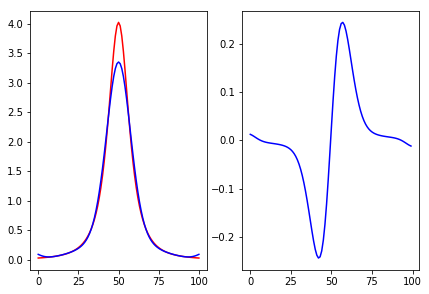

In [0]:
# depth 10, iter 20
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

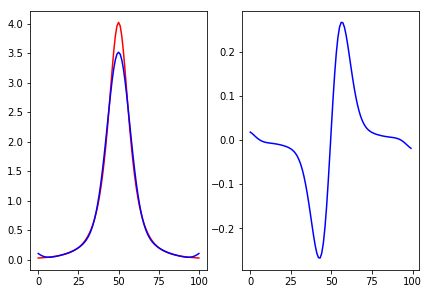

In [0]:
# depth 10, iter 30
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

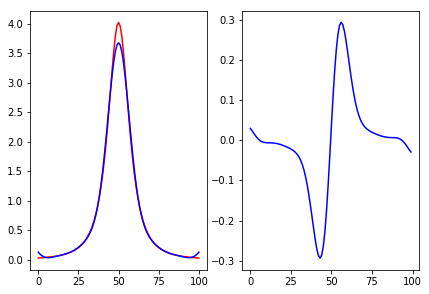

In [0]:
# depth 10, iter 50
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

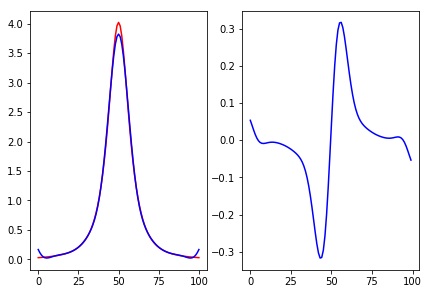

In [0]:
# depth 10, iter 100
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

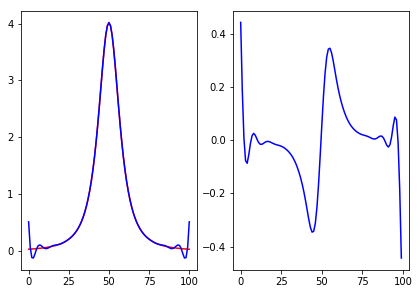

In [0]:
# depth 10, iter 2000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

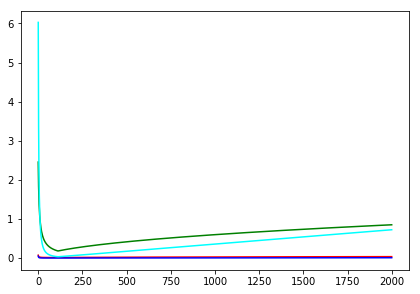

In [0]:
# depth 10
plt.plot([i for i in range(2000)], delta_mean[0:2000], c='r')
plt.plot([i for i in range(2000)], delta_max[0:2000], c='g')
plt.plot([i for i in range(2000)], delta_squared_mean[0:2000], c='b')
plt.plot([i for i in range(2000)], delta_squared_max[0:2000], c='cyan')

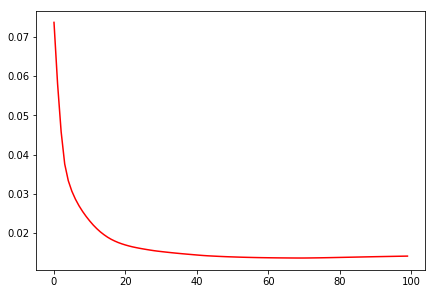

In [0]:
plt.plot([i for i in range(100)], delta_mean[0:100], c='r')

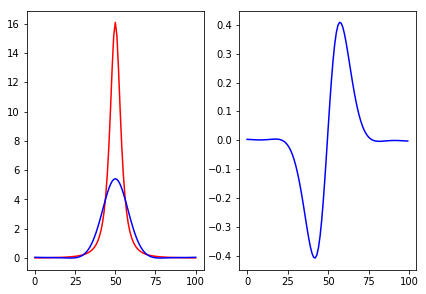

In [0]:
# depth 15, iter 20
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

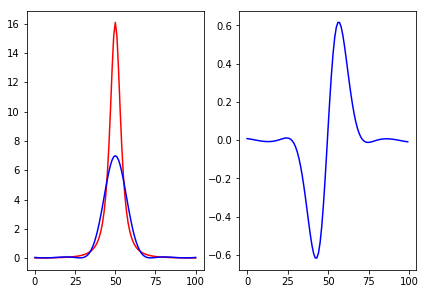

In [0]:
# depth 15, iter 50
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

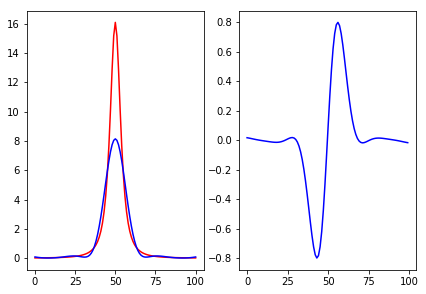

In [0]:
# depth 15, iter 100
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

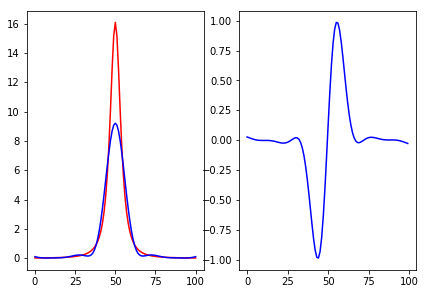

In [0]:
# depth 15, iter 200
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

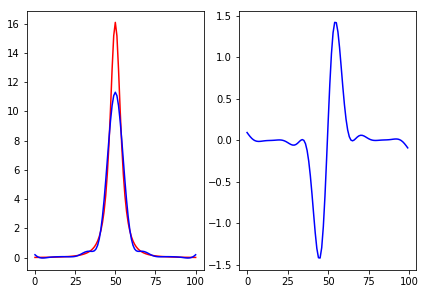

In [0]:
# depth 15, iter 1000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

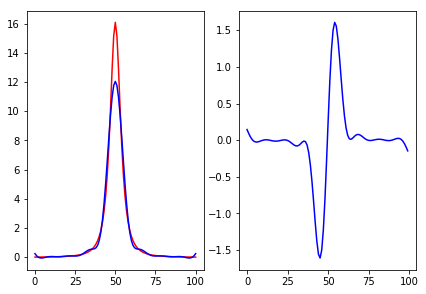

In [0]:
# depth 15, iter 2000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

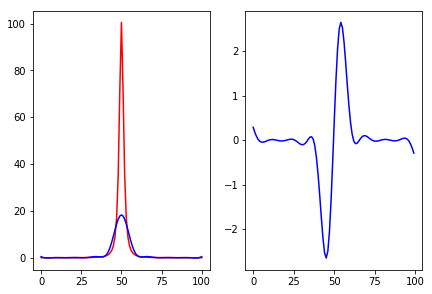

In [0]:
# depth 18, iter 1, U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

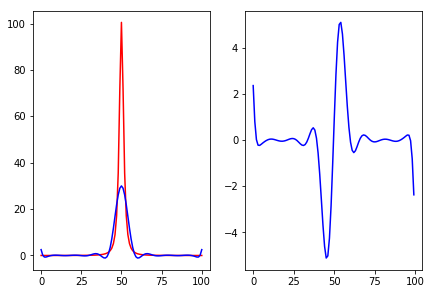

In [0]:
# depth 18, iter 20, U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

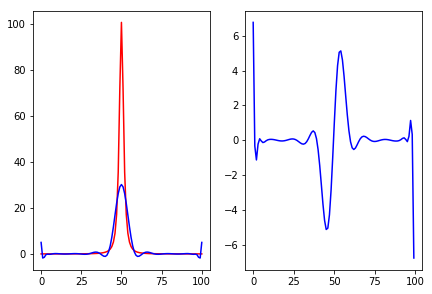

In [0]:
# depth 18, iter 100, U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

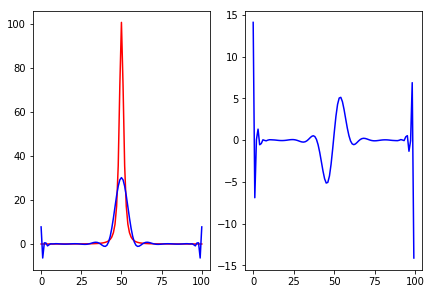

In [0]:
# depth 18, iter 500, U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

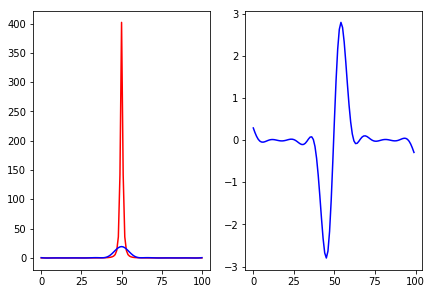

In [0]:
# depth 19, iter 1, , U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

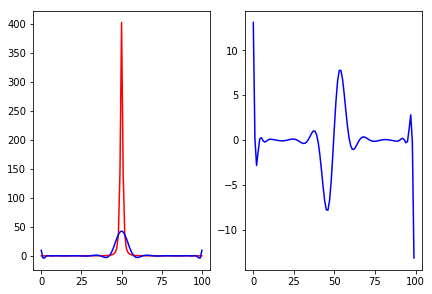

In [0]:
# depth 19, iter 200, , U_0 == result(depth=15 , iter=2000)
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

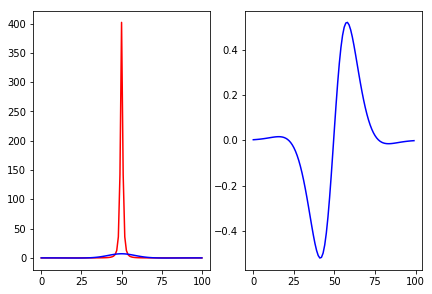

In [0]:
# depth 19, iter 20
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

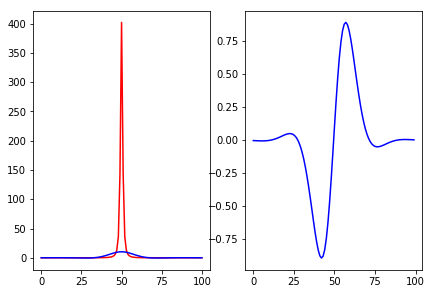

In [0]:
# depth 19, iter 50
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

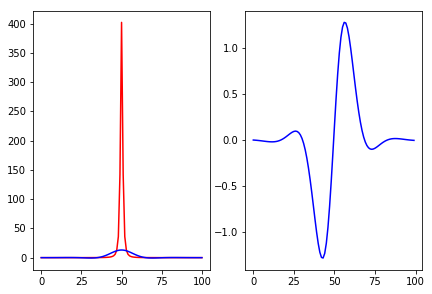

In [0]:
# depth 19, iter 100
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

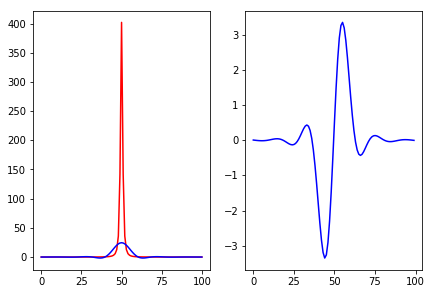

In [0]:
# depth 19, iter 1000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

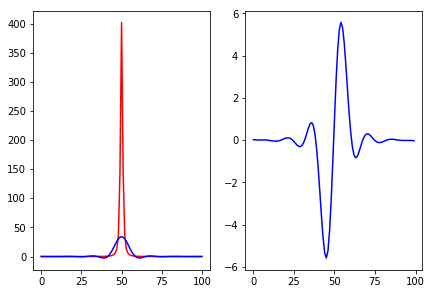

In [0]:
# depth 19, iter 5000
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

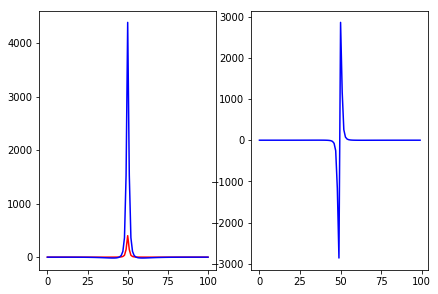

In [0]:
# depth 19, iter 10, U_0 == true_pot
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

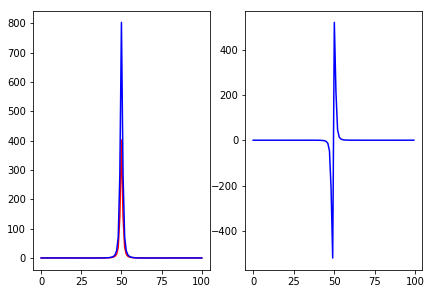

In [0]:
# depth 19, iter 1, U_0 == true_pot
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

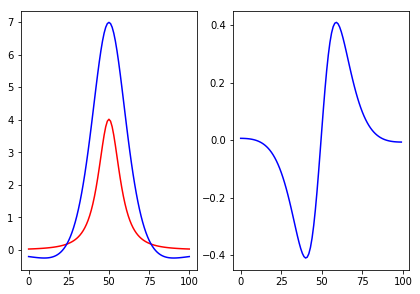

In [0]:
# depth 30, iter 10
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

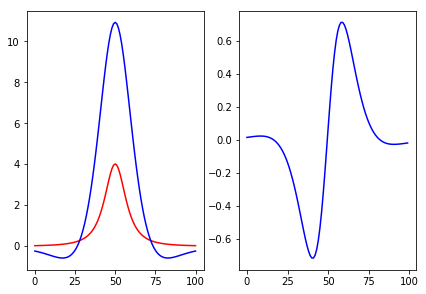

In [0]:
# depth 30, iter 20
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

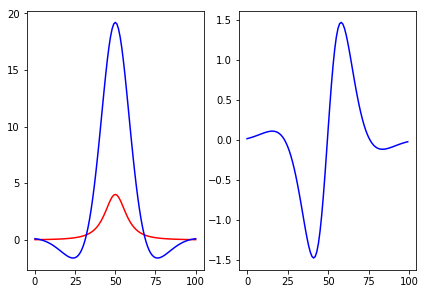

In [0]:
# depth 30, iter 50
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

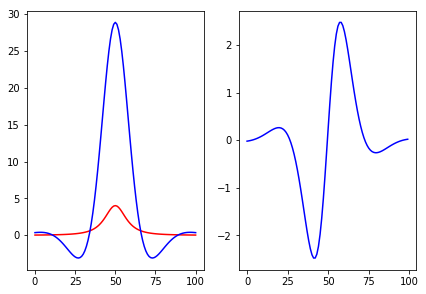

In [0]:
# depth 30, iter 100
plt.subplot(121)
plt.plot([i for i in range(101)], true_pot[:,50], c='r')
plt.plot([i for i in range(101)], result[:,50], c='b')
plt.subplot(122)
plt.plot([i for i in range(100)], Grad(result[:,50]), c='b')

# Toy bigger field

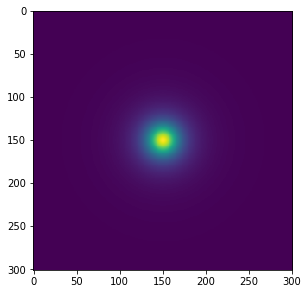

In [0]:
depth = 15

h = 20
image = np.zeros((301, 301))
true_pot = np.zeros((301, 301))
Norm_Const = 1e4

for j in range(0, 301):
  for k in range(0, 301):
    R = math.sqrt(h**2 + (150 - k)**2 + (150 - j)**2)
    R_t = math.sqrt((h-depth)**2 + (150 - k)**2 + (150 - j)**2)
    #U = -G * M / R
    g = h  * Norm_Const / (R**3)
    #image[j][k] += U
    image[j][k] += g
    true_pot[j][k] += abs(h - depth) * Norm_Const / (R_t**3)

plt.imshow(image)

In [0]:
args["size_cut"] = 301
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 40, depth = depth, args = args, true_pot = true_pot)
result = np.array(result.cpu()).reshape(301,301)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



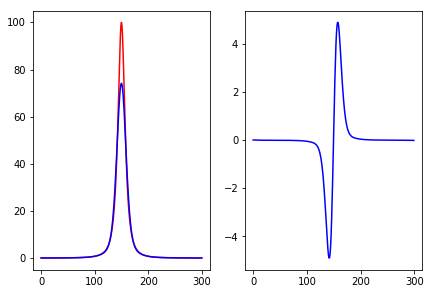

In [0]:
# depth 10, iter 10
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

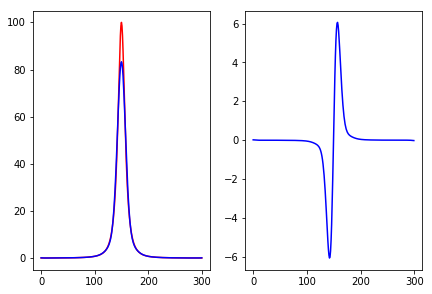

In [0]:
# depth 10, iter 20
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

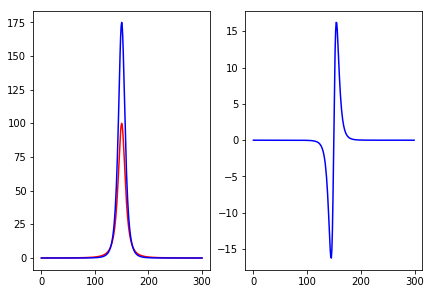

In [0]:
# depth 10, iter 1, U_0 == true_pot
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

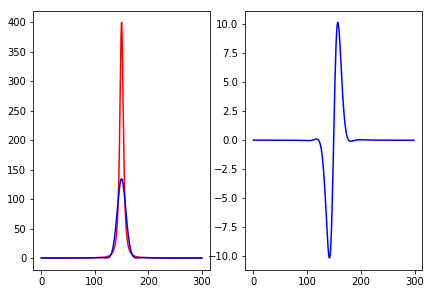

In [0]:
# depth 15, iter 20
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

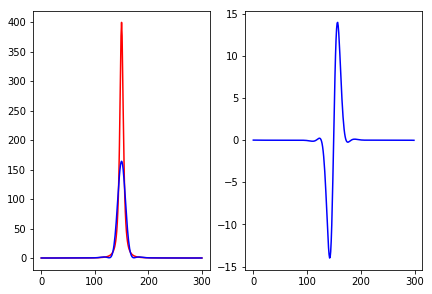

In [0]:
# depth 15, iter 40
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

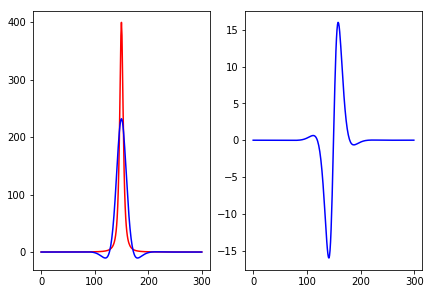

In [0]:
# depth 25, iter 20
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

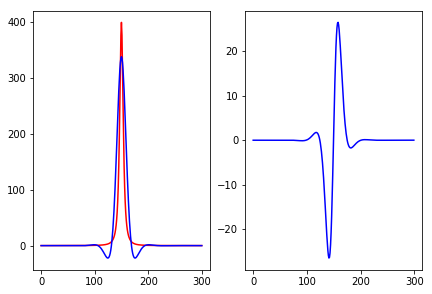

In [0]:
# depth 25, iter 40
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

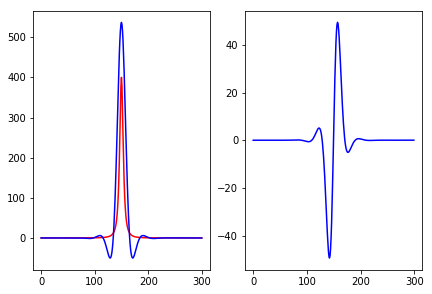

In [0]:
# depth 25, iter 100
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

#Try more accurate discretization

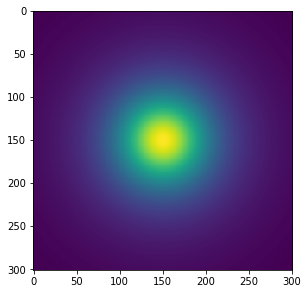

In [0]:
depth = 15

h = 20
image = np.zeros((301, 301))
true_pot = np.zeros((301, 301))
Norm_Const = 1e4
x = [i/3.0 for i in range(-150, 151)]
y = [i/3.0 for i in range(-150, 151)]
for j in range(0, 301):
  for k in range(0, 301):
    R = math.sqrt(h**2 + (x[k])**2 + (y[j])**2)
    R_t = math.sqrt((h-depth)**2 + (y[k])**2 + (y[j])**2)
    g = h * Norm_Const / (R**3)
    image[j][k] += g
    true_pot[j][k] += abs(h - depth) * Norm_Const / (R_t**3)

plt.imshow(image)

In [0]:
args["size_cut"] = 301
result , delta_mean, delta_max, delta_squared_mean, delta_squared_max = Main_Alghorithm(U = image, iter_number = 40, depth = depth, args = args, true_pot = true_pot, scale = 1.0/3)
result = np.array(result.cpu()).reshape(301,301)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



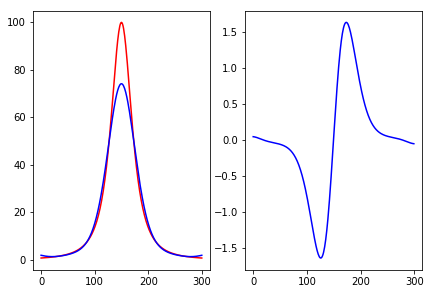

In [0]:
# depth 10, iter 10
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

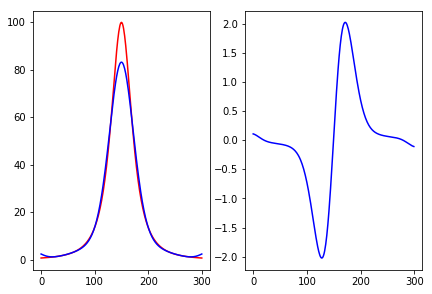

In [0]:
# depth 10, iter 20
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

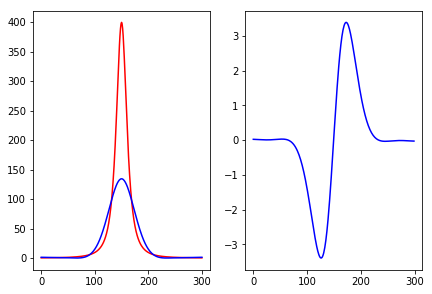

In [0]:
# depth 15, iter 20
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')

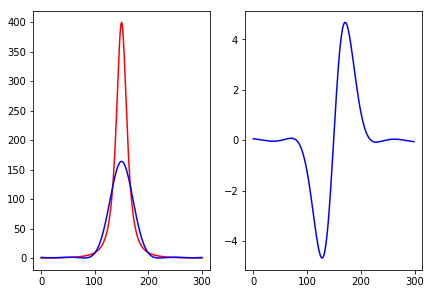

In [0]:
# depth 15, iter 40
plt.subplot(121)
plt.plot([i for i in range(301)], true_pot[:,150], c='r')
plt.plot([i for i in range(301)], result[:,150], c='b')
plt.subplot(122)
plt.plot([i for i in range(300)], Grad(result[:,150]), c='b')